#### 0. Import basic methods from source.py
Import useful methods from source.py (NB: can later be integrated into a package)

In [1]:
from source import *

#### 1. Open xls file and ingest Inputs table
Note I am assuming that all inputs will be aggregated into one single inputs table

In [2]:
filename = r'H2 Model - Input sheet.xlsm'

In [3]:
%%time
# load workbook
wb = load_workbook(filename)

CPU times: total: 547 ms
Wall time: 643 ms


In [4]:
# load worksheet
ws = wb["Input Tab"]

In [5]:
mapping = {}

for entry, data_boundary in ws.tables.items():
    # parse the data within the ref boundary
    data = ws[data_boundary]
    
    # extract the data (the inner list comprehension gets the values for each cell in the table)
    content = [[cell.value for cell in ent] for ent in data]
    
    # find header
    header = content[0]
    
    # find the rest ... the contents, excluding the header
    rest = content[1:]
    
    # create dataframe with the column names
    # and pair table name with dataframe
    df = pd.DataFrame(rest, columns = header)
    mapping[entry] = df

In [6]:
Inputs = pd.DataFrame(mapping['Scenario1'])
Inputs.head()

,Category,Sub-system,Element,Component,Description,Number,Unit,Comments
0,System input,Wind energy source & Transport,Offshore wind park,-,Total Windpark Capacity,3000,MW,None
1,System input,Wind energy source & Transport,Offshore wind park,Turbine,Windturbine Capacity per unit,20,MW,None
2,System input,Wind energy source & Transport,Offshore wind park,Inter-array cable,Length,50,km,None
3,System input,AC Substation & Transport,AC Substation & Transport,AC Substation,Capacity per unit,2000,MW,None
4,System input,AC Substation & Transport,AC Substation & Transport,AC collection cable,Length,25,km,None


#### 2. Data inspection 

In [7]:
Inputs.columns

Index(['Category', 'Sub-system', 'Element', 'Component', 'Description',
       'Number', 'Unit', 'Comments'],
      dtype='object')

In [8]:
Inputs[Inputs['Sub-system']=='Wind energy source & Transport'].head()

,Category,Sub-system,Element,Component,Description,Number,Unit,Comments
0,System input,Wind energy source & Transport,Offshore wind park,-,Total Windpark Capacity,3000,MW,None
1,System input,Wind energy source & Transport,Offshore wind park,Turbine,Windturbine Capacity per unit,20,MW,None
2,System input,Wind energy source & Transport,Offshore wind park,Inter-array cable,Length,50,km,None
14,System input,Wind energy source & Transport,Offshore wind park,Inter-array cable,Transport loss,0.02,%,None
23,Capex,Wind energy source & Transport,Offshore wind park,Foundation & cable,Foundation & cable costs (Development and Proj...,207000,EUR / MW,"0,1 * Foundation procurement"


In [9]:
list(Inputs['Sub-system'].unique())

['Wind energy source & Transport',
 'AC Substation & Transport',
 'Converter & Transport',
 'Electrolysis, Electricity & Transport',
 '-']

In [10]:
list(Inputs['Element'].unique())

['Offshore wind park',
 'AC Substation & Transport',
 'Converter',
 'Electrolysis',
 'Electricity',
 'Facility location',
 'Transport',
 '-']

In [11]:
list(Inputs['Component'].unique())

['-',
 'Turbine',
 'Inter-array cable',
 'AC Substation',
 'AC collection cable',
 'HVDC Converter',
 'HVDC cable',
 'Electrolyser',
 'DCAC Converter',
 'Artificial island',
 'Mainland',
 'H2 Pipeline',
 'Electricity cable',
 'HVDC Cable',
 'Foundation & cable',
 'DC collection cable',
 'Desalination unit',
 'Compressor unit',
 'Storage unit',
 'Compressor after storage']

#### 3. Select one item from the Inputs table (generate cashflow overview)

##### A. do per item

In [12]:
%%time
df_Foundations = Inputs_2_cashflow(Inputs, 
                                   startyear=2023,
                                   lifecycle=50,
                                   subsystem='Wind energy source & Transport',
                                   element='Offshore wind park',
                                   component='Foundation & cable',
                                   Debug=True)
df_Foundations.head()

'Escalation base year Foundation & cable: 2023'

'Escalation rate Foundation & cable: 0.02'

'Number of units Foundation & cable: 3000 MW'

'Construction duration Foundation & cable: 3 years'

'Construction allocation Foundation & cable: [0.4, 0.3, 0.3] per year'

'Economic Lifetime Foundation & cable: 50 years'

'Depreciation Flag Foundation & cable: 1'

'Yearly Variable Costs Flag Foundation & cable: 1'

'Yearly Variable Costs Rate Foundation & cable: 0.03'

'Insurance Flag Foundation & cable: 1'

'Insurance Rate Foundation & cable: 0.005'

'Decommissioning Foundation & cable: 0.02'

'Residual Value Foundation & cable: 0.01'

'CAPEX total Foundation & cable: 2691000 eu per MW'

CPU times: total: 141 ms
Wall time: 98.6 ms


,years,capex,opex,revenue
years,,,,
2023,2023,-3.293784e+09,0.000000e+00,0
2024,2024,-2.519745e+09,0.000000e+00,0
2025,2025,-2.570140e+09,0.000000e+00,0
2026,2026,0.000000e+00,-2.934284e+08,0
2027,2027,0.000000e+00,-2.934284e+08,0


In [13]:
%%time
df_npv_Foundations = calculate_npv(df_Foundations)
df_npv_Foundations.head()

CPU times: total: 15.6 ms
Wall time: 14.6 ms


,years,capex,opex,revenue,cashflow,cashflow_sum,npv,npv_sum
years,,,,,,,,
2023,2023,-3.293784e+09,0.000000e+00,0,-3.293784e+09,-3.293784e+09,0.000000e+00,0.000000e+00
2024,2024,-2.519745e+09,0.000000e+00,0,-2.519745e+09,-5.813529e+09,-4.967592e+08,-4.967592e+08
2025,2025,-2.570140e+09,0.000000e+00,0,-2.570140e+09,-8.383668e+09,-4.735461e+08,-9.703053e+08
2026,2026,0.000000e+00,-2.934284e+08,0,-2.934284e+08,-8.677097e+09,-5.052705e+07,-1.020832e+09
2027,2027,0.000000e+00,-2.934284e+08,0,-2.934284e+08,-8.970525e+09,-4.722154e+07,-1.068054e+09


CPU times: total: 4.17 s
Wall time: 4.24 s


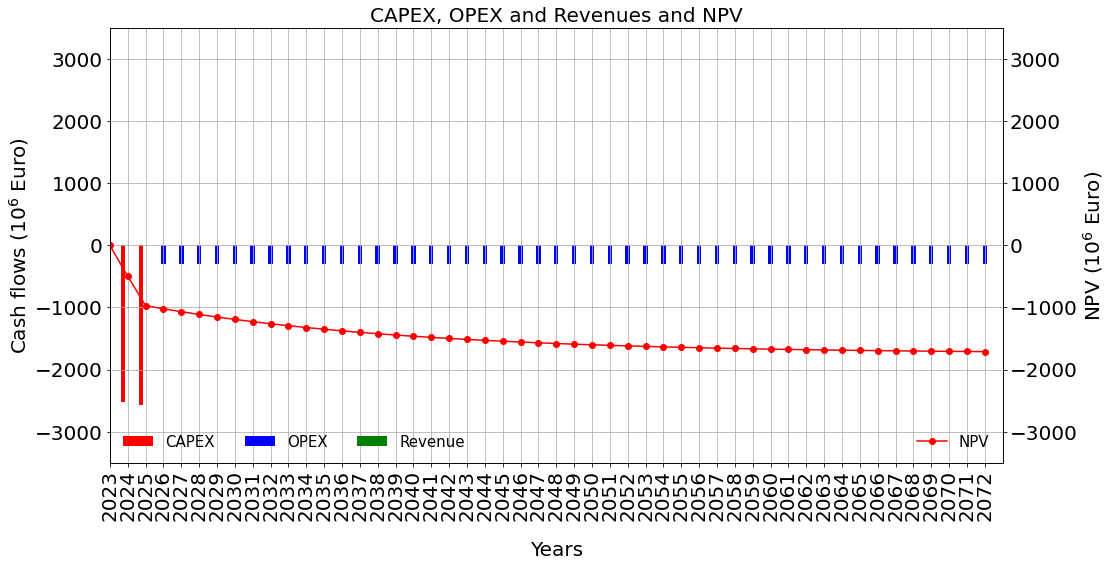

In [14]:
%%time
lims = [-3500, 3500]
create_npv_plot(df_npv_Foundations, cash_flow_lims=lims, npv_lims=lims)

In [15]:
%%time
df_Turbines = Inputs_2_cashflow(Inputs, 
                                   startyear=2023,
                                   lifecycle=11,
                                   subsystem='Wind energy source & Transport',
                                   element='Offshore wind park',
                                   component='Turbine',
                                   Debug=True)
df_Turbines.head()

'Escalation base year Turbine: 2023'

'Escalation rate Turbine: 0.02'

'Number of units Turbine: 3000 MW'

'Construction duration Turbine: 3 years'

'Construction allocation Turbine: [0.4, 0.3, 0.3] per year'

'Economic Lifetime Turbine: 50 years'

'Depreciation Flag Turbine: 1'

'Yearly Variable Costs Flag Turbine: 1'

'Yearly Variable Costs Rate Turbine: 0.03'

'Insurance Flag Turbine: 1'

'Insurance Rate Turbine: 0.005'

'Decommissioning Turbine: 0.02'

'Residual Value Turbine: 0.01'

'CAPEX total Turbine: 1495000 eu per MW'

CPU times: total: 156 ms
Wall time: 103 ms


,years,capex,opex,revenue
years,,,,
2023,2023,-1829880000,0.000000e+00,0
2024,2024,-1399858200,0.000000e+00,0
2025,2025,-1427855364,0.000000e+00,0
2026,2026,0,-1.630158e+08,0
2027,2027,0,-1.630158e+08,0


In [16]:
%%time
df_npv_Turbines = calculate_npv(df_Turbines)
df_npv_Turbines.head()

CPU times: total: 15.6 ms
Wall time: 18.3 ms


,years,capex,opex,revenue,cashflow,cashflow_sum,npv,npv_sum
years,,,,,,,,
2023,2023,-1829880000,0.000000e+00,0,-1.829880e+09,-1.829880e+09,0.000000e+00,0.000000e+00
2024,2024,-1399858200,0.000000e+00,0,-1.399858e+09,-3.229738e+09,-2.759773e+08,-2.759773e+08
2025,2025,-1427855364,0.000000e+00,0,-1.427855e+09,-4.657594e+09,-2.630812e+08,-5.390585e+08
2026,2026,0,-1.630158e+08,0,-1.630158e+08,-4.820609e+09,-2.807058e+07,-5.671291e+08
2027,2027,0,-1.630158e+08,0,-1.630158e+08,-4.983625e+09,-2.623419e+07,-5.933633e+08


CPU times: total: 4.28 s
Wall time: 4.29 s


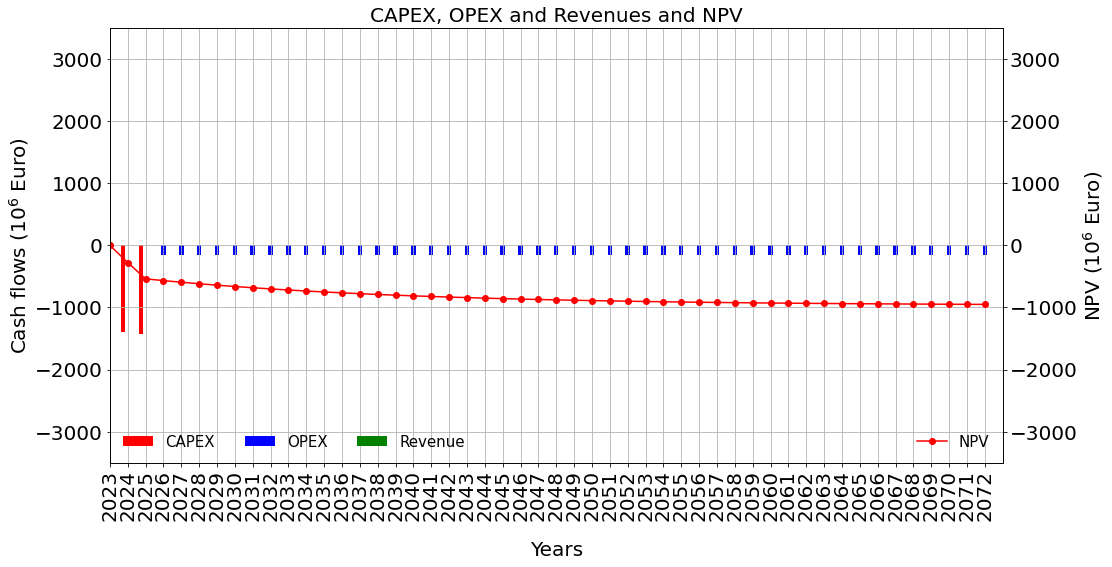

In [17]:
%%time
lims = [-3500, 3500]
create_npv_plot(df_npv_Turbines, cash_flow_lims=lims, npv_lims=lims)

##### B. combine two items

In [18]:
df_Foundations = Inputs_2_cashflow(Inputs, startyear=2023, lifecycle=11, component='Foundation & cable',Debug=False)
df_Turbines = Inputs_2_cashflow(Inputs, startyear=2023, lifecycle=11, component='Turbine',Debug=False)
df_combined = combine_cashflow_dataframes([df_Foundations, df_Turbines])

In [19]:
df_npv_combined = calculate_npv(df_combined)

In [ ]:
%%time
lims = [-4500, 4500]
create_npv_plot(df_npv_combined, cash_flow_lims=lims, npv_lims=lims)

CPU times: total: 4.41 s
Wall time: 4.42 s
